In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.append('/Users/adamboesky/Research/long_transients/')

from Extracting.utils import load_ecsv
from Extracting.Source_Extractor import Source_Extractor

CasJobs will use the credentials from mast_login_harvard.txt


/Users/adamboesky/opt/anaconda3/envs/long_transients/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pstarr = load_ecsv('/Users/adamboesky/Research/long_transients/Data/catalog_results/000791_01_1/PSTARR.ecsv')
pstarr

PanSTARR_ID,ra,dec,gKronMag,gKronMagErr,gPSFMag,gPSFMagErr,gpsfLikelihood,ginfoFlag2,primaryDetection,rKronMag,rKronMagErr,rPSFMag,rPSFMagErr,rpsfLikelihood,rinfoFlag2,iKronMag,iKronMagErr,iPSFMag,iPSFMagErr,ipsfLikelihood,iinfoFlag2
int64,float64,float64,float64,float64,float64,float64,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
170282069305336300,206.930500285126,51.9047446424154,21.097900390625,0.0409890003502369,21.6334991455078,0.0362319983541965,1.39939999214343e-22,655488.0,"""1""",20.2360000610352,0.0354259982705116,20.7803001403809,0.0321419984102249,0.0,655488.0,19.7630004882813,0.0168030001223087,20.4669990539551,0.0149919996038079,0.0,524416.0
170282069438479612,206.943829631392,51.9075371444213,20.8743991851807,0.0349289998412132,21.3701992034912,0.0302169993519783,1.00700998791479e-18,524416.0,"""1""",20.1427001953125,0.0280399993062019,20.7187995910645,0.02369200065732,0.0,524416.0,19.7663993835449,0.0171189997345209,20.4960994720459,0.0150359999388456,0.0,524416.0
170282069502939751,206.95028987,51.90753108,22.7922992706299,0.190056994557381,23.2539005279541,0.172328993678093,0.0010457000462338,0.0,"""1""",22.7310009002686,0.196016997098923,22.5776996612549,0.120012998580933,-0.925754010677338,0.0,21.7714004516602,0.0781899988651276,22.4706001281738,0.0986109972000122,2.67802002362066e-13,0.0
170282069590747195,206.95904711,51.90542986,--,--,--,--,--,--,"""1""",--,--,--,--,--,--,22.3477001190186,0.166052997112274,22.8917007446289,0.162622004747391,0.004522259812802,0.0
170282069612487434,206.96125241,51.90562785,--,--,--,--,--,--,"""1""",--,--,--,--,--,--,22.3227005004883,0.179195001721382,22.9685001373291,0.167759001255035,1.20673003038974e-05,0.0
170282069682485600,206.96822097,51.90415665,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,"""1""",22.103099822998,0.174777999520302,22.801399230957,0.174928992986679,1.00744000519626e-05,0.0,22.0006999969482,0.12457899749279,22.2840995788574,0.0986860021948814,0.0034128099214285,0.0
170282069684887952,206.96829073945,51.9060557866307,22.6487007141113,0.19302499294281,22.9990005493164,0.168279007077217,0.123690001666546,655360.0,"""1""",21.6662998199463,0.0990569964051247,22.1221008300781,0.0980139970779419,2.56749010940638e-10,655360.0,21.1550998687744,0.0604729987680912,21.7665004730225,0.0574029982089996,2.8628800718966096e-11,655360.0
170282069738545102,206.97375057,51.90364449,--,--,--,--,--,--,"""1""",--,--,--,--,--,--,22.4612007141113,0.145407006144524,23.0207004547119,0.145980000495911,1.51937001646729e-05,0.0
170282069763056678,206.97630828,51.90499724,--,--,--,--,--,--,"""1""",--,--,--,--,--,--,23.0750007629395,0.195684999227524,22.8307991027832,0.120443999767303,-0.4341059923172,0.0


In [76]:
len(g_tab), len(g_tab) - len(np.unique(g_tab['PSTARR_PanSTARR_ID']))

(296987, 68)

In [3]:
g_tab = load_ecsv('/Users/adamboesky/Research/long_transients/Data/catalog_results/field_results/000791_g.ecsv', careful_load=True)
g_tab = g_tab[g_tab['Catalog_Flag'] != 3]
g_tab

ra,dec,ZTF_thresh,ZTF_npix,ZTF_tnpix,ZTF_xmin,ZTF_xmax,ZTF_ymin,ZTF_ymax,ZTF_x,ZTF_y,ZTF_x2,ZTF_y2,ZTF_xy,ZTF_errx2,ZTF_erry2,ZTF_errxy,ZTF_a,ZTF_b,ZTF_theta,ZTF_cxx,ZTF_cyy,ZTF_cxy,ZTF_cflux,ZTF_flux,ZTF_cpeak,ZTF_peak,ZTF_xcpeak,ZTF_ycpeak,ZTF_xpeak,ZTF_ypeak,ZTF_sepExtractionFlag,ZTF_KronRad,ZTF_gKronMag,ZTF_gKronMagErr,ZTF_gKronCircleFlag,ZTF_gKronFlag,ZTF_gPSFMag,ZTF_gPSFMagErr,ZTF_gPSFFlags,ZTF_qfit,ZTF_cfit,ZTF_g_zero_pt_mag,ZTF_g_mag_limit,ZTF_ra,ZTF_dec,PSTARR_PanSTARR_ID,PSTARR_gKronMag,PSTARR_gKronMagErr,PSTARR_gPSFMag,PSTARR_gPSFMagErr,PSTARR_gpsfLikelihood,PSTARR_ginfoFlag2,PSTARR_rKronMag,PSTARR_rKronMagErr,PSTARR_rPSFMag,PSTARR_rPSFMagErr,PSTARR_rpsfLikelihood,PSTARR_rinfoFlag2,PSTARR_iKronMag,PSTARR_iKronMagErr,PSTARR_iPSFMag,PSTARR_iPSFMagErr,PSTARR_ipsfLikelihood,PSTARR_iinfoFlag2,PSTARR_ra,PSTARR_dec,association_separation_arcsec,Catalog,Catalog_Flag,x,y,fieldid,ccdid,qid
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,int64,float64,float64,str6,str2,str1
204.72974302427485,52.90290377399482,0.807962954044342,29.0,12.0,1707.0,1712.0,85.0,90.0,1709.2219442384273,86.80963186457177,1.0082805793343326,0.9665178232201814,-0.11427858088176279,0.00020183759692807783,0.00025776415846116564,-6.048520303429074e-05,1.0505093336105347,0.9333962202072144,-0.6950333118438721,1.0052589178085327,1.048695683479309,0.23771846294403076,465.13201904296875,468.6446533203125,69.153076171875,146.27984619140625,1709.0,87.0,1709.0,87.0,0.0,0.8006305443773546,18.275550252672737,0.00437324146886202,1.0,32.0,nan,nan,nan,nan,nan,26.325,23.96,204.72977294584268,52.90288368138445,171482047297764281,19.1686000823975,0.00790099985897541,19.1145000457764,0.00644699996337295,0.552150011062622,524416.0,17.963399887085,0.00382099999114871,17.8843994140625,0.002919000107795,-0.686819970607758,524416.0,16.8745994567871,0.00128900003619492,16.8031997680664,0.00103199994191527,-0.756417989730835,524416.0,204.729713102707,52.9029238666052,0.19445774617727665,Both,0,1709.2219442384273,86.80963186457177,000791,02,1
204.13404280272306,52.91279224653718,0.807962954044342,17.0,11.0,413.0,417.0,88.0,91.0,415.1536574200322,89.29702485886244,1.1352822628235142,0.7385800855540878,-0.029602962946474687,0.008939223437148553,0.005900183217700718,-0.0009275654959773488,1.0665266513824463,0.8581277132034302,-0.07407587766647339,0.881759762763977,1.3553658723831177,0.07068347185850143,45.15605163574219,50.47108459472656,5.883829116821289,9.601531982421875,415.0,89.0,415.0,89.0,0.0,0.06546584306572835,21.738923558993314,0.10369162478795342,1.0,32.0,nan,nan,nan,nan,nan,26.325,23.96,204.1339905260491,52.91277315523696,171492041340976155,21.7644996643066,0.0613330006599426,21.9610996246338,0.0484779998660088,7.88761026342399e-05,655488.0,20.4507999420166,0.0329289995133877,20.8071002960205,0.0259050000458956,1.17460002670193e-17,524416.0,19.9398994445801,0.0185160003602505,20.3118000030518,0.0130719998851418,5.89689989283215e-05,524416.0,204.134095079397,52.9128113378374,0.2653534945098067,Both,0,415.1536574200322,89.29702485886244,000791,02,1
205.24627853360482,52.89078253566295,0.807962954044342,13.0,9.0,2830.0,2833.0,87.0,92.0,2831.7095727954193,88.93738970894232,0.5674881574980923,1.8701929533109842,0.43017248930127483,0.020355570270244365,0.06971739854175657,0.01620673361364092,1.41400945186615,0.6620109677314758,1.2789602279663086,2.134280204772949,0.6476223468780518,-0.9818331003189087,16.797658920288086,21.41375732421875,2.0707616806030273,3.887847900390625,2832.0,89.0,

In [9]:
from collections import Counter

# Count how often each ID appears
id_counts = Counter(g_tab['PSTARR_PanSTARR_ID'])

# Select rows where the ID appears more than once
duplicate_mask = np.array([id_counts[id_] > 1 for id_ in g_tab['PSTARR_PanSTARR_ID']])

duplicate_rows = g_tab[duplicate_mask]

In [10]:
duplicate_rows

ra,dec,ZTF_thresh,ZTF_npix,ZTF_tnpix,ZTF_xmin,ZTF_xmax,ZTF_ymin,ZTF_ymax,ZTF_x,ZTF_y,ZTF_x2,ZTF_y2,ZTF_xy,ZTF_errx2,ZTF_erry2,ZTF_errxy,ZTF_a,ZTF_b,ZTF_theta,ZTF_cxx,ZTF_cyy,ZTF_cxy,ZTF_cflux,ZTF_flux,ZTF_cpeak,ZTF_peak,ZTF_xcpeak,ZTF_ycpeak,ZTF_xpeak,ZTF_ypeak,ZTF_sepExtractionFlag,ZTF_KronRad,ZTF_gKronMag,ZTF_gKronMagErr,ZTF_gKronCircleFlag,ZTF_gKronFlag,ZTF_gPSFMag,ZTF_gPSFMagErr,ZTF_gPSFFlags,ZTF_qfit,ZTF_cfit,ZTF_g_zero_pt_mag,ZTF_g_mag_limit,ZTF_ra,ZTF_dec,PSTARR_PanSTARR_ID,PSTARR_gKronMag,PSTARR_gKronMagErr,PSTARR_gPSFMag,PSTARR_gPSFMagErr,PSTARR_gpsfLikelihood,PSTARR_ginfoFlag2,PSTARR_rKronMag,PSTARR_rKronMagErr,PSTARR_rPSFMag,PSTARR_rPSFMagErr,PSTARR_rpsfLikelihood,PSTARR_rinfoFlag2,PSTARR_iKronMag,PSTARR_iKronMagErr,PSTARR_iPSFMag,PSTARR_iPSFMagErr,PSTARR_ipsfLikelihood,PSTARR_iinfoFlag2,PSTARR_ra,PSTARR_dec,association_separation_arcsec,Catalog,Catalog_Flag,x,y,fieldid,ccdid,qid
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,int64,float64,float64,str6,str2,str1
204.61059403427302,52.90014186825673,0.807962954044342,19.0,15.0,1449.0,1453.0,103.0,108.0,1450.8833847697924,105.15128093458974,1.2745395423693577,2.0170057481398906,-0.5857071123067548,0.03174596496502307,0.04830777325140049,-0.015186745947524501,1.5294502973556519,0.9758724570274353,-1.0678566694259644,0.9054204225540161,0.5721322894096375,0.5258400440216064,24.591312408447266,29.664413452148438,2.1032352447509766,4.3076324462890625,1451.0,105.0,1452.0,105.0,0.0,3.584419061652782,21.68470501165559,0.23715057972696776,0.0,32.0,23.044869853169814,0.14762052065990694,0.0,1.1926395906983365,-0.10384068481415167,26.325,23.96,204.61059403427302,52.90014186825673,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,ZTF,1,1450.8833847697924,105.15128093458974,000791,02,1
204.67183651532235,52.89749296350204,0.807962954044342,8.0,6.0,1583.0,1586.0,109.0,111.0,1584.1204340215445,110.38067357043877,1.061542643529338,0.4664878899515301,0.3587924921430621,0.0636583911171447,0.02779637045037581,0.018834790489102953,1.1091082096099854,0.545810878276825,0.43923744559288025,1.272940754890442,2.896711587905884,-1.9581283330917358,9.554463386535645,12.521133422851562,1.444046974182129,2.867095947265625,1585.0,111.0,1583.0,110.0,0.0,0.0,23.356958395325968,0.4561702674085509,1.0,128.0,23.437649380417138,0.22436997104300038,0.0,1.7364297513958349,-0.05211156339066896,26.325,23.96,204.67183651532235,52.89749296350204,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,ZTF,1,1584.1204340215445,110.38067357043877,000791,02,1
205.15259396616116,52.88711970750255,0.807962954044342,7.0,6.0,2628.0,2630.0,109.0,111.0,2628.995354880575,109.98772335033634,0.5235142882312865,0.5285513079065594,-0.24633510014993554,0.03800928122412828,0.038018892424266884,-0.018996939513978857,0.8788519501686096,0.5288523435592651,-0.7905099391937256,2.4467341899871826,2.423417091369629,2.2806358337402344,8.300551414489746,11.457839965820312,1.610640525817871,2.68255615234375,2629.0,110.0,2629.0,110.0,0.0,2.3879027060209292,23.05152421322674,0.31089827284108623,0.0,0.0,23.4148553542511,0.21901592953851542,0.0,1.184349043277226,-0.01835395738883053,26.325,23.96,205.15259396616116,52.88711970750255,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,ZTF,1,2628.995354880575,109.98772335033634,000791,02,1
204.63810382753047,52.89746818288391,0.807962954044342,8.0,6.0,1510.0,1512.0,112.0,114.0,1510.903786248838,11

In [11]:
g_tab[g_tab['PSTARR_PanSTARR_ID'] == 171262008709131611]

ra,dec,ZTF_thresh,ZTF_npix,ZTF_tnpix,ZTF_xmin,ZTF_xmax,ZTF_ymin,ZTF_ymax,ZTF_x,ZTF_y,ZTF_x2,ZTF_y2,ZTF_xy,ZTF_errx2,ZTF_erry2,ZTF_errxy,ZTF_a,ZTF_b,ZTF_theta,ZTF_cxx,ZTF_cyy,ZTF_cxy,ZTF_cflux,ZTF_flux,ZTF_cpeak,ZTF_peak,ZTF_xcpeak,ZTF_ycpeak,ZTF_xpeak,ZTF_ypeak,ZTF_sepExtractionFlag,ZTF_KronRad,ZTF_gKronMag,ZTF_gKronMagErr,ZTF_gKronCircleFlag,ZTF_gKronFlag,ZTF_gPSFMag,ZTF_gPSFMagErr,ZTF_gPSFFlags,ZTF_qfit,ZTF_cfit,ZTF_g_zero_pt_mag,ZTF_g_mag_limit,ZTF_ra,ZTF_dec,PSTARR_PanSTARR_ID,PSTARR_gKronMag,PSTARR_gKronMagErr,PSTARR_gPSFMag,PSTARR_gPSFMagErr,PSTARR_gpsfLikelihood,PSTARR_ginfoFlag2,PSTARR_rKronMag,PSTARR_rKronMagErr,PSTARR_rPSFMag,PSTARR_rPSFMagErr,PSTARR_rpsfLikelihood,PSTARR_rinfoFlag2,PSTARR_iKronMag,PSTARR_iKronMagErr,PSTARR_iPSFMag,PSTARR_iPSFMagErr,PSTARR_ipsfLikelihood,PSTARR_iinfoFlag2,PSTARR_ra,PSTARR_dec,association_separation_arcsec,Catalog,Catalog_Flag,x,y,fieldid,ccdid,qid
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,int64,float64,float64,str6,str2,str1
200.87089349,52.71742714,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,23.76,nan,nan,171262008709131611,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,22.7320995330811,0.222237005829811,22.7222995758057,0.142312005162239,0.249647006392479,0.0,200.87089349,52.71742714,nan,PSTARR,2,3114.0,821.0,000791,03,2


In [2]:
from Extracting.utils import true_nearby

nan_mask = np.load('/Users/adamboesky/Research/long_transients/Data/catalog_results/000791_03_1/nan_masks/ZTF_g_nan_mask.npy')
true_nearby(row=817,
           column=1,
           radius=15,  # nan within 15 pixels is bad!
           mask=nan_mask
)

True

In [99]:
nan_mask[807:827, 0:10]

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True, 

In [81]:
sextractor1 = Source_Extractor('/Users/adamboesky/Research/long_transients/Data/ztf_data/ztf_000791_zg_c03_q1_refimg.fits')
sextractor2 = Source_Extractor('/Users/adamboesky/Research/long_transients/Data/ztf_data/ztf_000791_zg_c03_q2_refimg.fits')

(717.034391474323, 917.034391474323)

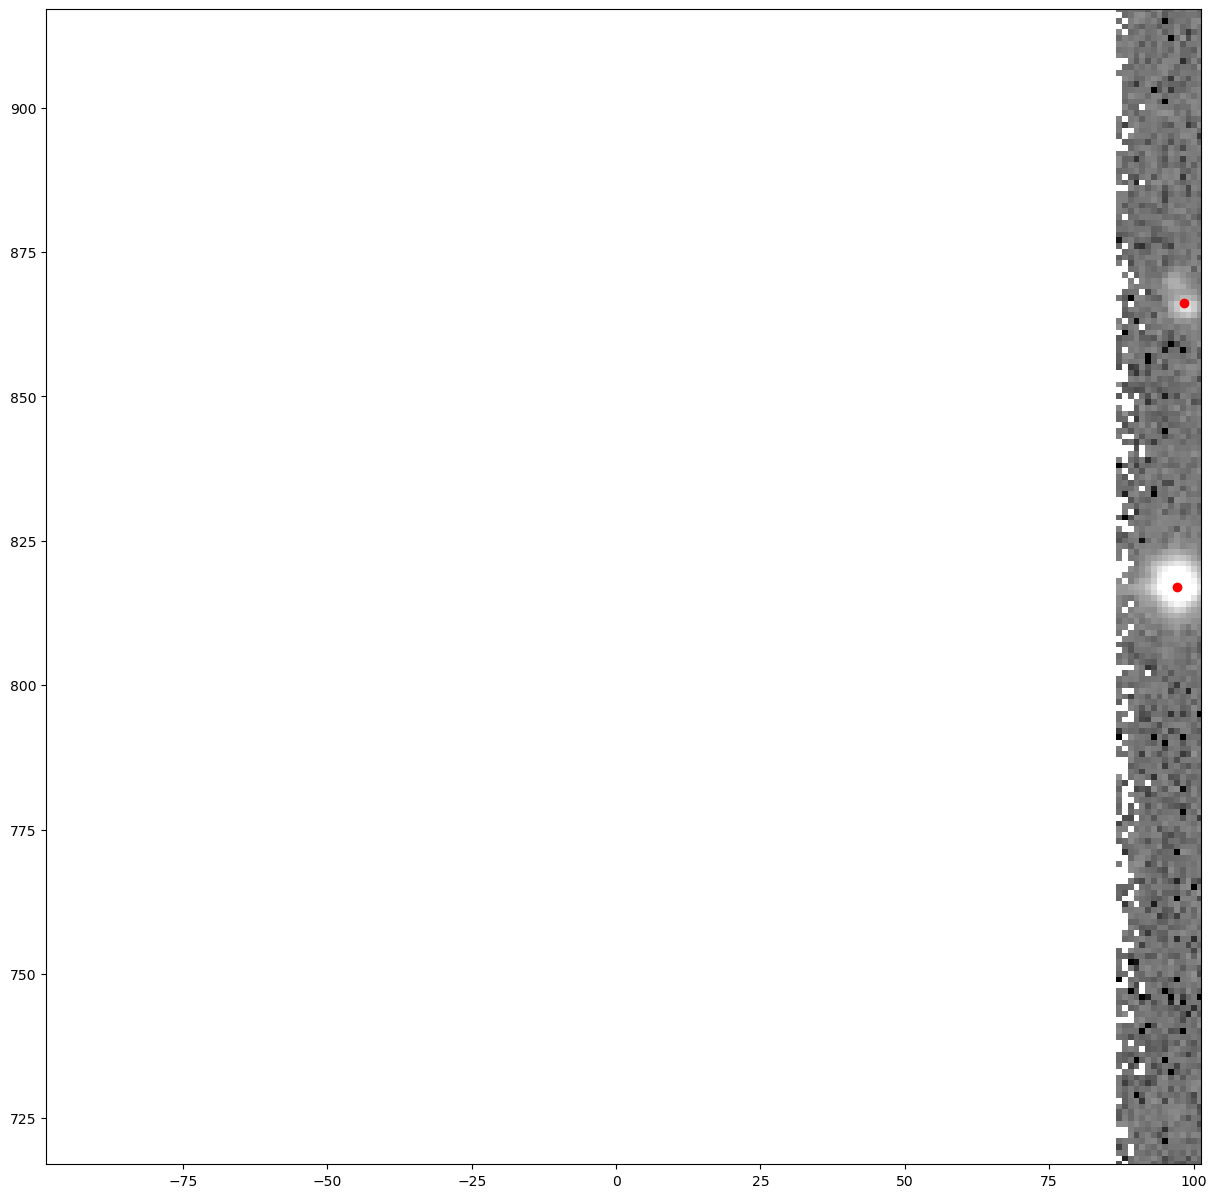

In [92]:
import matplotlib.pyplot as plt

sextractor1.plot_segmap(image_is_subtracted=True)
x0, y0 = sextractor1.ra_dec_to_pix(200.87089349, 52.71742714)
pad = 100
plt.xlim((x0-pad, x0+pad))
plt.ylim((y0-pad, y0+pad))

(770.9628230673036, 870.9628230673036)

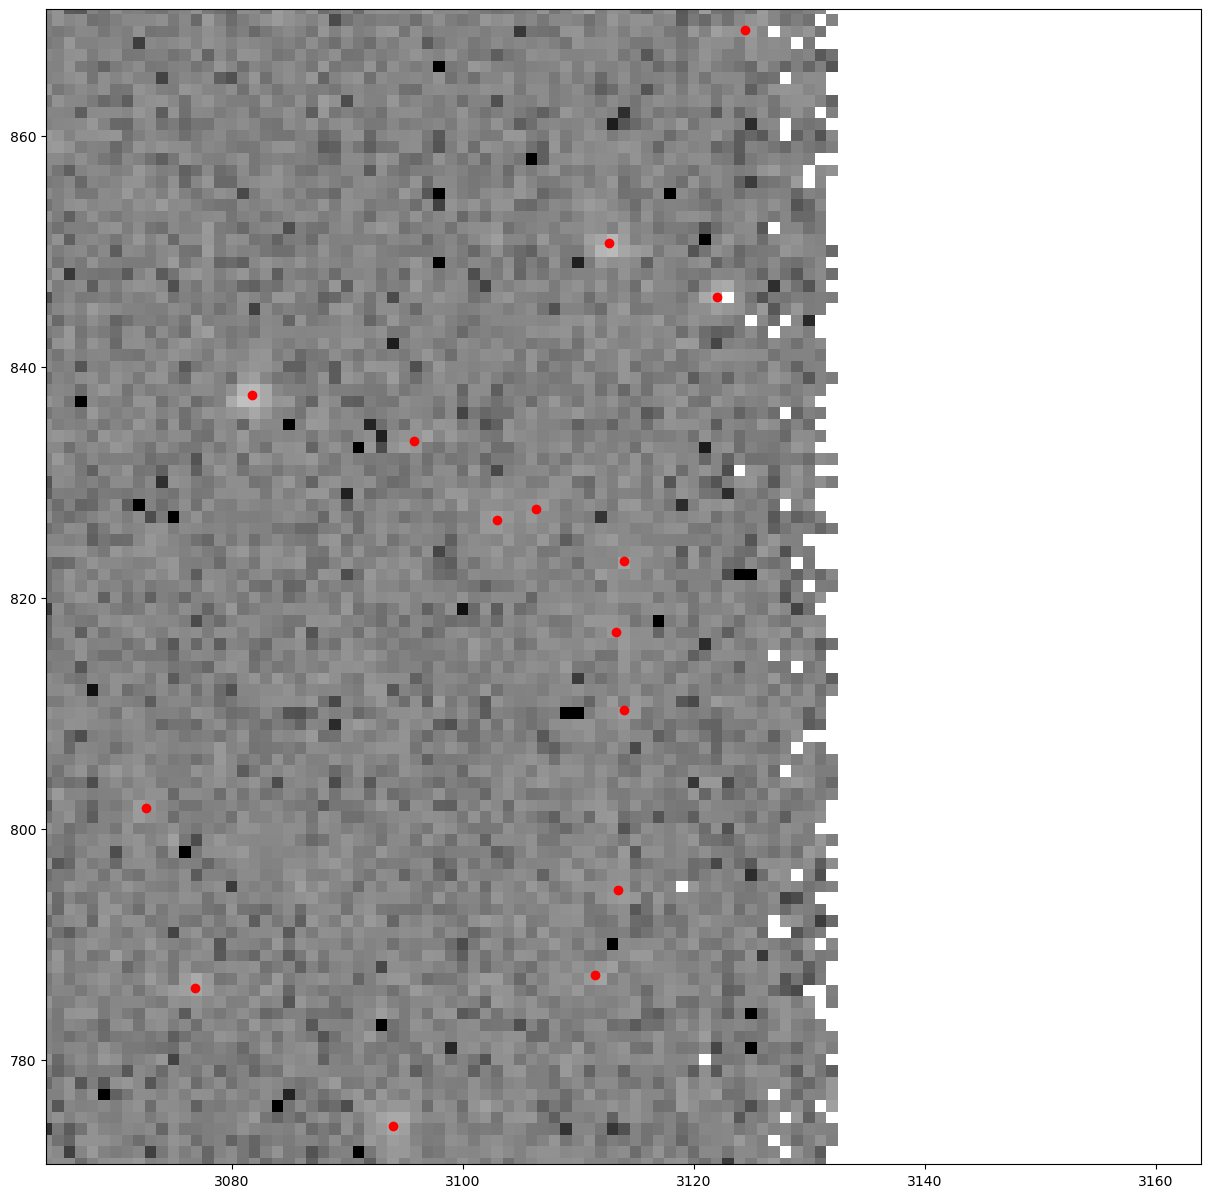

In [93]:
import matplotlib.pyplot as plt

sextractor2.plot_segmap(image_is_subtracted=True)
x0, y0 = sextractor2.ra_dec_to_pix(200.87089349, 52.71742714)
pad = 50
plt.xlim((x0-pad, x0+pad))
plt.ylim((y0-pad, y0+pad))

In [39]:
test = load_ecsv('/Users/adamboesky/Research/long_transients/Data/catalog_results/000791_03_2/g_associated.ecsv', careful_load=True)
test[['ra', 'dec', 'PSTARR_PanSTARR_ID']]

ra,dec,PSTARR_PanSTARR_ID
float64,float64,object
200.63192640618195,52.92427676703515,171502006316729972
200.02382810036318,52.913946259637854,171492000238197533
200.0743259803841,52.914973059329924,171492000745348844
199.54475888600504,52.904045002744766,171481995444915582
199.96866609672554,52.912927760719086,171491999687316254
200.3323877553219,52.918578384763705,171502003324502987
200.54894567539432,52.921798100864976,171502005490856785
199.6715179207775,52.90631746255991,171481996714468224
199.76875233330222,52.90835103376611,171491997687060717


In [9]:
test[test['PSTARR_PanSTARR_ID'] == 171532009200415440]

ra,dec,ZTF_thresh,ZTF_npix,ZTF_tnpix,ZTF_xmin,ZTF_xmax,ZTF_ymin,ZTF_ymax,ZTF_x,ZTF_y,ZTF_x2,ZTF_y2,ZTF_xy,ZTF_errx2,ZTF_erry2,ZTF_errxy,ZTF_a,ZTF_b,ZTF_theta,ZTF_cxx,ZTF_cyy,ZTF_cxy,ZTF_cflux,ZTF_flux,ZTF_cpeak,ZTF_peak,ZTF_xcpeak,ZTF_ycpeak,ZTF_xpeak,ZTF_ypeak,ZTF_sepExtractionFlag,ZTF_KronRad,ZTF_gKronMag,ZTF_gKronMagErr,ZTF_gKronCircleFlag,ZTF_gKronFlag,ZTF_gPSFMag,ZTF_gPSFMagErr,ZTF_gPSFFlags,ZTF_qfit,ZTF_cfit,ZTF_g_zero_pt_mag,ZTF_g_mag_limit,ZTF_ra,ZTF_dec,PSTARR_PanSTARR_ID,PSTARR_gKronMag,PSTARR_gKronMagErr,PSTARR_gPSFMag,PSTARR_gPSFMagErr,PSTARR_gpsfLikelihood,PSTARR_ginfoFlag2,PSTARR_rKronMag,PSTARR_rKronMagErr,PSTARR_rPSFMag,PSTARR_rPSFMagErr,PSTARR_rpsfLikelihood,PSTARR_rinfoFlag2,PSTARR_iKronMag,PSTARR_iKronMagErr,PSTARR_iPSFMag,PSTARR_iPSFMagErr,PSTARR_ipsfLikelihood,PSTARR_iinfoFlag2,PSTARR_ra,PSTARR_dec,association_separation_arcsec,Catalog,Catalog_Flag,x,y
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,int64,float64,float64
200.92003949,52.94563536,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,23.76,nan,nan,171532009200415440,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,22.5863990783691,0.218161001801491,22.9444999694824,0.169204995036125,0.687885999679565,0.0,200.92003949,52.94563536,nan,PSTARR,3,3236.0,1.0


# Figuring out flowchart plots

In [ ]:
import pandas as pd
stats_df = pd.read_csv('/Users/adamboesky/Research/long_transients/Data/filter_results/000791/0_filter_stats.csv')
from Source_Analysis.filter_fields import create_filter_flowchart, combine_stats
create_filter_flowchart(stats_df)

import matplotlib.pyplot as plt
plt.show()

In [21]:
old_stats_df = pd.read_csv('/Volumes/T7/long_transients/filter_results_thesis/000806/0_filter_stats.csv')
old_stats_df['branch'] = old_stats_df['branch'].fillna('')
old_stats_df = old_stats_df.groupby(['filter', 'branch']).sum()
old_stats_df

,,ng_before,ng_after,nr_before,nr_after,ni_before,ni_after
filter,branch,,,,,,
at_least_n_bands,,46.0,1.0,50.0,1.0,42.0,0.0
only_big_dmag,,209807.0,46.0,253642.0,50.0,160475.0,42.0
parallax_filter,,1.0,1.0,1.0,1.0,0.0,0.0
proper_motion_filter,,1.0,1.0,1.0,1.0,0.0,0.0
psf_fit_filter,,209917.0,209807.0,253768.0,253642.0,160670.0,160475.0
sep_extraction_filter,,266163.0,266162.0,313044.0,313044.0,212769.0,212769.0
shape_filter,,214802.0,209917.0,262779.0,253768.0,164459.0,160670.0
snr_filter,,266162.0,214802.0,313044.0,262779.0,212769.0,164459.0


In [26]:
np.intersect1d(old_stats_df.index.names, ['filter', 'branch'])

array(['branch', 'filter'], dtype='<U6')

In [13]:
stats_df = pd.read_csv('/Users/adamboesky/Research/long_transients/Data/filter_results/000791/0_filter_stats.csv')
stats_df

,filter,n_g_before,n_g_after,n_r_before,n_r_after,n_i_before,n_i_after,n_gri_before,n_gri_after,n_gr_before,n_gr_after,n_gi_before,n_gi_after,n_ri_before,n_ri_after,branch
0,sep_extraction_filter,103756.0,103752.0,140837.0,140837.0,149565.0,149565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,snr_filter,103752.0,49331.0,140837.0,78527.0,149565.0,91364.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,shape_filter,49331.0,47944.0,78527.0,76683.0,91364.0,89286.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,psf_fit_filter,47944.0,47920.0,76683.0,76644.0,89286.0,89232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,dec_greater_than,47920.0,47920.0,76644.0,76644.0,89232.0,89232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,only_big_dmag,47920.0,13.0,76644.0,32.0,89232.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,at_least_n_bands,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,0.0,3.0,3.0,NaN
7,proper_motion_filter,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,0.0,3.0,3.0,NaN
8,parallax_filter,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,0.0,3.0,3.0,NaN


# Figuring out bad sources

In [ ]:
import matplotlib.pyplot as plt
from Source_Analysis.Sources import Sources, Source
from Extracting.utils import load_ecsv

srcs = Sources.from_file('/Users/adamboesky/Research/long_transients/Data/filter_results/000791/2_g_test.ecsv')

CasJobs will use the credentials from mast_login.txt


/Users/adamboesky/opt/anaconda3/envs/long_transients/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py:1408: UserWarning: data table does not have all the mandatory columns, adding them with nans.
  warnings.warn("data table does not have all the mandatory columns, adding them with nans.")
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10fed7470>>
Traceback (most recent call last):
  File "/Users/adamboesky/opt/anaconda3/envs/long_transients/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

In [16]:
srcs[0].data['ZTF_g_zero_pt_mag']

nan


In [ ]:
for i, src in enumerate(srcs):
    src.plot_everything()
    plt.savefig(f'/Users/adamboesky/Research/long_transients/Data/analysis_pages_debugging/in_pstarr/{i}.pdf', bbox_inches='tight')

/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py:975: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py:1000: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  wise_ax.errorbar(
/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py:1010: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  wise_ax.errorbar(
/Users/adamboesky/opt/anaconda3/envs/long_transients/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 7 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/U

Querying metadata from https://irsa.ipac.caltech.edu/ibe/search/ztf/products/deep?WHERE=field=000791+AND+ccdid=04+AND+qid=2
Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmp0swb1qs5/ztf_000791_zi_c04_q2_refimg.fits
Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmp8k1kqrs6/ztf_000791_zr_c04_q2_refimg.fits
Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmpxxfupzy8/ztf_000791_zg_c04_q2_refimg.fits
Querying ztf catalog for light curve...Querying wise catalog for light curve...

Querying ptf catalog for light curve...
Querying sdss catalog for light curve...
Querying panstarrs catalog for light curve...
Querying gaia catalog for light curve...
Querying custom catalog for light curve...


/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py:975: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(


Getting source spectrum from SDSS...
Source at (197.815643637907, 52.0112332168949) has no spectrum in SDSS.
Querying metadata from https://irsa.ipac.caltech.edu/ibe/search/ztf/products/deep?WHERE=field=000791+AND+ccdid=04+AND+qid=2
Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmps7meyaj9/ztf_000791_zi_c04_q2_refimg.fits
Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmpvom55qx4/ztf_000791_zg_c04_q2_refimg.fits
Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmpdajdrwrs/ztf_000791_zr_c04_q2_refimg.fits
Querying ztf catalog for light curve...Querying wise catalog for light curve...

Querying ptf catalog for light curve...
Querying sdss catalog for light curve...
Querying panstarrs catalog for light curve...
Querying gaia catalog for light curve...
Querying custom catalog for light curve...


/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py:975: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(


Getting source spectrum from SDSS...
Source at (196.59478466326, 52.0239981710513) has no spectrum in SDSS.
Querying metadata from https://irsa.ipac.caltech.edu/ibe/search/ztf/products/deep?WHERE=field=000791+AND+ccdid=04+AND+qid=2

Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmp964lx2ky/ztf_000791_zr_c04_q2_refimg.fits
Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmpvhjxakvy/ztf_000791_zg_c04_q2_refimg.fits
Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmpijbja3hw/ztf_000791_zi_c04_q2_refimg.fits
Querying ztf catalog for light curve...Querying wise catalog for light curve...

Querying ptf catalog for light curve...
Querying sdss catalog for light curve...
Querying panstarrs catalog for light curve...
Querying gaia catalog for light curve...
Querying custom catalog for light curve...


/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py:975: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(


Getting source spectrum from SDSS...
Source at (196.87608764, 52.01922808) has no spectrum in SDSS.
Querying metadata from https://irsa.ipac.caltech.edu/ibe/search/ztf/products/deep?WHERE=field=000791+AND+ccdid=04+AND+qid=2

Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmpw9km5uvv/ztf_000791_zi_c04_q2_refimg.fits
Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmp78nmxhhz/ztf_000791_zg_c04_q2_refimg.fits
Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmp288yhdxc/ztf_000791_zr_c04_q2_refimg.fits
Querying ztf catalog for light curve...Querying wise catalog for light curve...

Querying ptf catalog for light curve...
Querying sdss catalog for light curve...
Querying panstarrs catalog for light curve...
Querying gaia catalog for light curve...
Querying custom catalog for light curve...


/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py:975: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(


Getting source spectrum from SDSS...
Source at (197.022285038682, 52.0213715455617) has no spectrum in SDSS.
Querying metadata from https://irsa.ipac.caltech.edu/ibe/search/ztf/products/deep?WHERE=field=000791+AND+ccdid=04+AND+qid=2

Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmp28k2d3hx/ztf_000791_zi_c04_q2_refimg.fits
Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmpj5nzdk_7/ztf_000791_zg_c04_q2_refimg.fits
Image downloaded and saved at /var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/tmpp9ifwljp/ztf_000791_zr_c04_q2_refimg.fits
Querying ztf catalog for light curve...Querying wise catalog for light curve...

Querying ptf catalog for light curve...
Querying sdss catalog for light curve...
Querying panstarrs catalog for light curve...
Querying gaia catalog for light curve...
Querying custom catalog for light curve...


In [2]:
import ztffields

main_fields = ztffields.get_fieldid(grid="main")
secondary_fields = ztffields.get_fieldid(grid="secondary")

/Users/adamboesky/opt/anaconda3/envs/long_transients/lib/python3.12/site-packages/ztffields/plotting.py:879: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches = [Polygon(**fieldvert_.to_dict(), **kwargs) for i, fieldvert_ in fieldverts.iterrows()]
/Users/adamboesky/opt/anaconda3/envs/long_transients/lib/python3.12/site-packages/ztffields/plotting.py:879: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches = [Polygon(**fieldvert_.to_dict(), **kwargs) for i, fieldvert_ in fieldverts.iterrows()]


Text(0.5, 0.98, 'Secondary Fields')

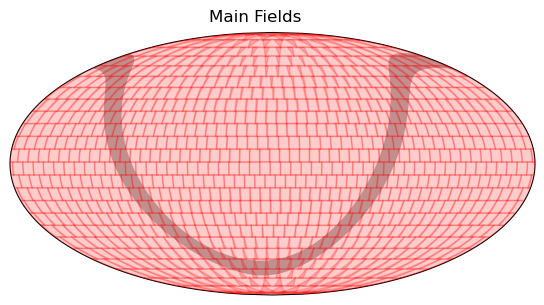

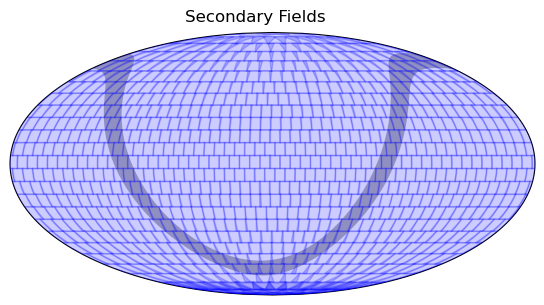

In [12]:
fig = ztffields.skyplot_fields(main_fields, color="red", alpha=0.2)
fig.suptitle("Main Fields")
fig = ztffields.skyplot_fields(secondary_fields, color="blue", alpha=0.2)
fig.suptitle("Secondary Fields")

# Check the delta in filtration numbers

In [15]:
import pandas as pd

In [23]:
for tab_num in range(3):
    stats_df = pd.read_csv(f'/Users/adamboesky/Research/long_transients/Data/filter_results/000791/{tab_num}_filter_stats.csv')
    base_stats_df = pd.read_csv(f'/Users/adamboesky/Research/long_transients/Data/filter_results_base/000791/{tab_num}_filter_stats.csv')
    
    print(f'Catalog {tab_num}')
    for row, base_row in zip(stats_df.iterrows(), base_stats_df.iterrows()):
        after_cols = [col for col in stats_df.columns if 'after' in col]
        print('Delta:', row[1]['filter'], row[1][after_cols].sum() - base_row[1][after_cols].sum())
    print('\n')

Catalog 0
Delta: sep_extraction_filter 11.0
Delta: snr_filter 0.0
Delta: shape_filter 0.0
Delta: psf_fit_filter 290.0
Delta: dec_greater_than 290.0
Delta: only_big_dmag 0.0
Delta: at_least_n_bands 0.0
Delta: proper_motion_filter 0.0
Delta: parallax_filter 0.0


Catalog 1
Delta: sep_extraction_filter 162.0
Delta: snr_filter 162.0
Delta: shape_filter 0.0
Delta: psf_fit_filter 82.0
Delta: dec_greater_than 82.0
Delta: snr_filter 29.0
Delta: only_big_dmag 0.0
Delta: at_least_n_bands 0.0
Delta: proper_motion_filter 0.0
Delta: parallax_filter 0.0
Delta: only_big_dmag 0.0
Delta: at_least_n_bands 0.0
Delta: no_nearby_source_filter 0.0
Delta: proper_motion_filter 0.0
Delta: parallax_filter 0.0


Catalog 2
Delta: pstarr_mag_less_than 0.0
Delta: snr_filter 0.0
Delta: dec_greater_than 0.0
Delta: sep_extraction_filter 0.0
Delta: snr_filter 0.0
Delta: shape_filter 0.0
Delta: psf_fit_filter 7.0
Delta: only_big_dmag 0.0
Delta: at_least_n_bands 0.0
Delta: proper_motion_filter 0.0
Delta: parallax_filter 

In [17]:
stats_df

,filter,n_g_before,n_g_after,n_r_before,n_r_after,n_i_before,n_i_after,n_gri_before,n_gri_after,n_gr_before,n_gr_after,n_gi_before,n_gi_after,n_ri_before,n_ri_after,branch
0,sep_extraction_filter,248502.0,248502.0,357453.0,357453.0,350175.0,350175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,snr_filter,248502.0,117012.0,357453.0,203594.0,350175.0,214758.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,shape_filter,117012.0,113671.0,203594.0,198802.0,214758.0,209984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,psf_fit_filter,113671.0,113671.0,198802.0,198802.0,209984.0,209984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,dec_greater_than,113671.0,113671.0,198802.0,198802.0,209984.0,209984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,only_big_dmag,113671.0,38.0,198802.0,77.0,209984.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,at_least_n_bands,0.0,0.0,0.0,0.0,0.0,0.0,198.0,5.0,198.0,5.0,198.0,2.0,198.0,13.0,NaN
7,proper_motion_filter,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,2.0,2.0,13.0,13.0,NaN
8,parallax_filter,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,2.0,2.0,13.0,13.0,NaN


In [47]:
from Extracting.utils import load_ecsv

tab0 = load_ecsv('/Users/adamboesky/Research/long_transients/Data/catalog_results/000791_01_1/PSTARR.ecsv')
print(tab0[[c for c in tab0.columns if 'flag' in c.lower()]])
tab0

ginfoFlag2 rinfoFlag2  iinfoFlag  iinfoFlag2
---------- ---------- ----------- ----------
  655488.0   655488.0 262160391.0   524416.0
  524416.0   524416.0 262160391.0   524416.0
       0.0        0.0  35667969.0        0.0
       nan        nan  35651585.0        0.0
       nan        nan  35667969.0        0.0
    -999.0        0.0  35651585.0        0.0
  655360.0   655360.0 262160391.0   655360.0
       nan        nan  35667969.0        0.0
       nan        nan  35651585.0        0.0
       0.0     -999.0  35651585.0        0.0
       ...        ...         ...        ...
       nan        nan  35651585.0        0.0
       nan        nan  35651585.0        0.0
       nan        nan  35651585.0        0.0
       nan        nan  35651585.0        0.0
       nan        nan  35667969.0        0.0
       nan        nan  35651585.0        0.0
       nan        nan  35651585.0        0.0
       nan        nan  35651585.0        0.0
       0.0     -999.0         nan        nan
       nan

PanSTARR_ID,ra,dec,gKronMag,gKronMagErr,gPSFMag,gPSFMagErr,gpsfLikelihood,ginfoFlag2,primaryDetection,rKronMag,rKronMagErr,rPSFMag,rPSFMagErr,rpsfLikelihood,rinfoFlag2,iKronMag,iKronMagErr,iPSFMag,iPSFMagErr,ipsfLikelihood,iinfoFlag,iinfoFlag2
object,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
170282069305336300,206.930500285126,51.9047446424154,21.097900390625,0.0409890003502369,21.6334991455078,0.0362319983541965,1.39939999214343e-22,655488.0,1,20.2360000610352,0.0354259982705116,20.7803001403809,0.0321419984102249,0.0,655488.0,19.7630004882813,0.0168030001223087,20.4669990539551,0.0149919996038079,0.0,262160391.0,524416.0
170282069438479612,206.943829631392,51.9075371444213,20.8743991851807,0.0349289998412132,21.3701992034912,0.0302169993519783,1.00700998791479e-18,524416.0,1,20.1427001953125,0.0280399993062019,20.7187995910645,0.02369200065732,0.0,524416.0,19.7663993835449,0.0171189997345209,20.4960994720459,0.0150359999388456,0.0,262160391.0,524416.0
170282069502939751,206.95028987,51.90753108,22.7922992706299,0.190056994557381,23.2539005279541,0.172328993678093,0.00104570004623383,0.0,1,22.7310009002686,0.196016997098923,22.5776996612549,0.120012998580933,-0.925754010677338,0.0,21.7714004516602,0.0781899988651276,22.4706001281738,0.0986109972000122,2.67802002362066e-13,35667969.0,0.0
170282069590747195,206.95904711,51.90542986,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,22.3477001190186,0.166052997112274,22.8917007446289,0.162622004747391,0.00452225981280208,35651585.0,0.0
170282069612487434,206.96125241,51.90562785,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,22.3227005004883,0.179195001721382,22.9685001373291,0.167759001255035,1.20673003038974e-05,35667969.0,0.0
170282069682485600,206.96822097,51.90415665,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1,22.103099822998,0.174777999520302,22.801399230957,0.174928992986679,1.00744000519626e-05,0.0,22.0006999969482,0.12457899749279,22.2840995788574,0.0986860021948814,0.00341280992142856,35651585.0,0.0
170282069684887952,206.96829073945,51.9060557866307,22.6487007141113,0.19302499294281,22.9990005493164,0.168279007077217,0.123690001666546,655360.0,1,21.6662998199463,0.0990569964051247,22.1221008300781,0.0980139970779419,2.56749010940638e-10,655360.0,21.1550998687744,0.0604729987680912,21.7665004730225,0.0574029982089996,2.86288007189661e-11,262160391.0,655360.0
170282069738545102,206.97375057,51.90364449,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,22.4612007141113,0.145407006144524,23.0207004547119,0.145980000495911,1.51937001646729e-05,35667969.0,0.0
170282069763056678,206.97630828,51.90499724,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,23.0750007629395,0.195684999227524,22.8307991027832,0.120443999767303,-0.4341059923172,35651585.0,0.0


In [ ]:
tab = load_ecsv('/Users/adamboesky/Research/long_transients/Data/catalog_results/field_results/000791_g.ecsv')
tab

ra,dec,ZTF_thresh,ZTF_npix,ZTF_tnpix,ZTF_xmin,ZTF_xmax,ZTF_ymin,ZTF_ymax,ZTF_x,ZTF_y,ZTF_x2,ZTF_y2,ZTF_xy,ZTF_errx2,ZTF_erry2,ZTF_errxy,ZTF_a,ZTF_b,ZTF_theta,ZTF_cxx,ZTF_cyy,ZTF_cxy,ZTF_cflux,ZTF_flux,ZTF_cpeak,ZTF_peak,ZTF_xcpeak,ZTF_ycpeak,ZTF_xpeak,ZTF_ypeak,ZTF_sepExtractionFlag,ZTF_KronRad,ZTF_gKronMag,ZTF_gKronMagErr,ZTF_gKronCircleFlag,ZTF_gKronFlag,ZTF_gPSFMag,ZTF_gPSFMagErr,ZTF_gPSFFlags,ZTF_qfit,ZTF_cfit,ZTF_g_zero_pt_mag,ZTF_g_mag_limit,ZTF_ra,ZTF_dec,PSTARR_PanSTARR_ID,PSTARR_gKronMag,PSTARR_gKronMagErr,PSTARR_gPSFMag,PSTARR_gPSFMagErr,PSTARR_gpsfLikelihood,PSTARR_ginfoFlag2,PSTARR_rKronMag,PSTARR_rKronMagErr,PSTARR_rPSFMag,PSTARR_rPSFMagErr,PSTARR_rpsfLikelihood,PSTARR_rinfoFlag2,PSTARR_iKronMag,PSTARR_iKronMagErr,PSTARR_iPSFMag,PSTARR_iPSFMagErr,PSTARR_ipsfLikelihood,PSTARR_iinfoFlag2,PSTARR_ra,PSTARR_dec,association_separation_arcsec,Catalog,Catalog_Flag,x,y,fieldid,ccdid,qid,PSTARR_ginfoFlag,PSTARR_iinfoFlag,PSTARR_rinfoFlag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,int64,float64,float64,str6,str2,str1,float64,float64,float64
197.43379107124076,52.82898167463138,0.8582237362861633,7.0,6.0,2319.0,2322.0,77.0,78.0,2320.1803086282225,77.38991378185351,0.893977572646218,0.2378810245742037,-0.08282256158130852,0.0632527174940961,0.01453967482931767,-0.0069794988323273344,0.9509317278862,0.4770612120628357,-0.12365131080150604,1.1558804512023926,4.343899250030518,0.8048811554908752,9.361407279968262,14.035430908203125,1.9325733184814453,3.65704345703125,2320.0,77.0,2320.0,77.0,0.0,2.8490199596630834,22.059966745801788,0.15619137870642152,0.0,32.0,nan,nan,nan,nan,nan,26.325,23.88,197.43373128248155,52.829009339262754,171391974338985442,nan,nan,nan,nan,nan,nan,22.5828990936279,0.136308997869492,23.0414009094238,0.145003005862236,9.10594972083345e-05,0.0,22.0226993560791,0.0944409966468811,22.5608997344971,0.083517000079155,2.60409997281386e-05,0.0,197.43385086,52.82895401,0.32760277785420944,Both,0,2320.1803086282225,77.38991378185351,000791,04,2,--,--,--
196.95542636780826,52.80827351119842,0.8582237362861633,7.0,6.0,1276.0,1279.0,77.0,79.0,1276.8638508635522,77.85021435955836,1.028018035116022,0.38710057582238944,0.00012653906288317973,0.10067144653690953,0.03539015303361352,8.16093187628061e-05,1.0139122009277344,0.6221740245819092,0.00019743424491025507,0.9727455973625183,2.583307981491089,-0.0006359604303725064,7.721147537231445,12.288711547851562,1.5281782150268555,3.14605712890625,1276.0,78.0,1276.0,78.0,0.0,2.1050532572712917,22.602787471308936,0.22401343972588675,0.0,32.0,nan,nan,nan,nan,nan,26.325,23.88,196.9554182156165,52.808334332396846,171371969554970587,22.7812995910645,0.178307995200157,22.8484001159668,0.124673001468182,0.14733099937439,0.0,nan,nan,nan,nan,nan,nan,21.729700088501,0.0839530006051064,22.2208003997803,0.0689259991049767,0.00782684981822968,0.0,196.95543452,52.80821269,0.43934763910925023,Both,0,1276.8638508635522,77.85021435955836,000791,04,2,--,--,--
197.58119281729216,52.83464410169796,0.8582237362861633,5.0,5.0,2641.0,2642.0,77.0,79.0,2641.606010624056,78.1480489159197,0.23876174758718716,0.529194081161696,-0.12937718402880383,0.027877523430164714,0.06534188182707901,-0.013975896314449114,0.7605704665184021,0.43530258536338806,-1.2069060802459717,4.827847003936768,2.178227663040161,2.3606207370758057,5.638533592224121,8.867584228515625,1.367936134338379,2.1408538818359375,2642.0,78.0,2642.0,78.0,0.0,1.6123751313134165,23.693220684956042,0.6655153487065302,1.0,32.0,nan,nan,nan,nan,nan,26.32

In [41]:
tab0[tab0['PanSTARR_ID'] == 171391974338985442]

PanSTARR_ID,ra,dec,gKronMag,gKronMagErr,gPSFMag,gPSFMagErr,gpsfLikelihood,ginfoFlag2,primaryDetection,rKronMag,rKronMagErr,rPSFMag,rPSFMagErr,rpsfLikelihood,rinfoFlag2,iKronMag,iKronMagErr,iPSFMag,iPSFMagErr,ipsfLikelihood,iinfoFlag,iinfoFlag2
object,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [71]:
t = load_ecsv('/Users/adamboesky/Research/long_transients/Data/catalog_results/000791_02_1/PSTARR.ecsv')
t[[c for c in t.columns if 'flag' in c.lower()]]

ginfoFlag,ginfoFlag2,rinfoFlag,rinfoFlag2,iinfoFlag,iinfoFlag2
float64,float64,float64,float64,float64,float64
nan,nan,nan,nan,35667969.0,0.0
-999.0,-999.0,186646529.0,655360.0,262160391.0,655360.0
35653633.0,0.0,-999.0,-999.0,nan,nan
35667969.0,0.0,-999.0,-999.0,nan,nan
35667969.0,0.0,-999.0,-999.0,nan,nan
35651585.0,0.0,-999.0,-999.0,nan,nan
35651585.0,0.0,-999.0,-999.0,nan,nan
262160391.0,655360.0,262160391.0,524288.0,262160391.0,524416.0
-999.0,-999.0,195035141.0,655360.0,262160391.0,524288.0


In [52]:
from astropy.io import fits

In [53]:
fits.info('/Users/adamboesky/Research/long_transients/Data/ztf_data/ztf_000791_zr_c04_q4_refimg.fits')

Filename: /Users/adamboesky/Research/long_transients/Data/ztf_data/ztf_000791_zr_c04_q4_refimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (3200, 3200)   float32   


In [55]:
fits.info('/Users/adamboesky/Research/long_transients/Data/ztf_data/ztf_000791_zr_c03_q2_refimg.fits')

Filename: /Users/adamboesky/Research/long_transients/Data/ztf_data/ztf_000791_zr_c03_q2_refimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (3200, 3200)   float32   


In [70]:
fits.info('/Users/adamboesky/Research/long_transients/Data/ztf_data/ztf_000791_zr_c07_q1_refimg.fits')

Filename: /Users/adamboesky/Research/long_transients/Data/ztf_data/ztf_000791_zr_c07_q1_refimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (3200, 3200)   float32   


In [69]:
fits.open('/Users/adamboesky/Research/long_transients/Data/ztf_data/ztf_000791_zr_c07_q1_refimg.fits')[0].data

TypeError: buffer is too small for requested array

In [1]:
from Extracting.utils import load_ecsv

CasJobs will use the credentials from mast_login.txt


In [2]:
tab = load_ecsv('/Users/adamboesky/Research/long_transients/Data/catalog_results/000791_01_1/PSTARR.ecsv')
tab

PanSTARR_ID,ra,dec,qualityFlag,objInfoFlag,gKronMag,gKronMagErr,gPSFMag,gPSFMagErr,gpsfLikelihood,ginfoFlag,ginfoFlag2,primaryDetection,rKronMag,rKronMagErr,rPSFMag,rPSFMagErr,rpsfLikelihood,rinfoFlag,rinfoFlag2,iKronMag,iKronMagErr,iPSFMag,iPSFMagErr,ipsfLikelihood,iinfoFlag,iinfoFlag2
object,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
170282069305336300,206.930500285126,51.9047446424154,53,444915712.0,21.097900390625,0.0409890003502369,21.6334991455078,0.0362319983541965,1.39939999214343e-22,262160391.0,655488.0,1,20.2360000610352,0.0354259982705116,20.7803001403809,0.0321419984102249,0.0,262160391.0,655488.0,19.7630004882813,0.0168030001223087,20.4669990539551,0.0149919996038079,0.0,262160391.0,524416.0
170282069438479612,206.943829631392,51.9075371444213,53,444915712.0,20.8743991851807,0.0349289998412132,21.3701992034912,0.0302169993519783,1.00700998791479e-18,262160391.0,524416.0,1,20.1427001953125,0.0280399993062019,20.7187995910645,0.02369200065732,0.0,262160391.0,524416.0,19.7663993835449,0.0171189997345209,20.4960994720459,0.0150359999388456,0.0,262160391.0,524416.0
170282069502939751,206.95028987,51.90753108,53,444674048.0,22.7922992706299,0.190056994557381,23.2539005279541,0.172328993678093,0.00104570004623383,35667969.0,0.0,1,22.7310009002686,0.196016997098923,22.5776996612549,0.120012998580933,-0.925754010677338,35651585.0,0.0,21.7714004516602,0.0781899988651276,22.4706001281738,0.0986109972000122,2.67802002362066e-13,35667969.0,0.0
170282069590747195,206.95904711,51.90542986,48,404226048.0,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,22.3477001190186,0.166052997112274,22.8917007446289,0.162622004747391,0.00452225981280208,35651585.0,0.0
170282069612487434,206.96125241,51.90562785,160,1343750144.0,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,22.3227005004883,0.179195001721382,22.9685001373291,0.167759001255035,1.20673003038974e-05,35667969.0,0.0
170282069682485600,206.96822097,51.90415665,52,436285440.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1,22.103099822998,0.174777999520302,22.801399230957,0.174928992986679,1.00744000519626e-05,35667969.0,0.0,22.0006999969482,0.12457899749279,22.2840995788574,0.0986860021948814,0.00341280992142856,35651585.0,0.0
170282069684887952,206.96829073945,51.9060557866307,52,436527104.0,22.6487007141113,0.19302499294281,22.9990005493164,0.168279007077217,0.123690001666546,195035141.0,655360.0,1,21.6662998199463,0.0990569964051247,22.1221008300781,0.0980139970779419,2.56749010940638e-10,262160391.0,655360.0,21.1550998687744,0.0604729987680912,21.7665004730225,0.0574029982089996,2.86288007189661e-11,262160391.0,655360.0
170282069738545102,206.97375057,51.90364449,164,1375809536.0,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,22.4612007141113,0.145407006144524,23.0207004547119,0.145980000495911,1.51937001646729e-05,35667969.0,0.0
170282069763056678,206.97630828,51.90499724,160,1343750144.0,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,23.0750007629395,0.195684999227524,22.8307991027832,0.120443999767303,-0.4341059923172,35651585.0,0.0


In [4]:
from astroquery.ipac.irsa import Irsa

for c in Irsa.list_catalogs():
    print(c)

spitzer.m31irac_image
mipslg
spitzer.mips_lg_images
spitzer.mipsgal_images
mipsgala
mipsgalc
spitzer.s5_spectra
spitzer.s5_lores
spitzer.s5_hires
s4gcat
s4getg
cs4gcat
spitzer.s4g_images
spitzer.s4g_details
safires70
safires160
spitzer.safires_images
spitzer.safires_science
spitzer.safires_ancillary
sagearciracv2
sagecatiracv2
sage_ar_irac
sage_cat_irac
sage_ar_irac_e1e2
sage_cat_irac_e1e2
sage_ar_irac_match
sage_cat_irac_match
sage_ar_irac_off
sage_cat_irac_off
sagecatmips24v2
sage_cat_m24
sage_full_m24
sage_cat_m24_match
sage_full_m24_match
sage_cat_m70
sage_full_m70
sage_cat_m160
sage_full_m160
sagefull
sagevar
spitzer.sage_images
spitzer.sage_mips_mos
spitzer.sage_irs
spitzer.sage_mips_sed
spitzer.sage_sed
spitzer.sage_irs_nods
spitzer.sage_mips_tiles
spitzer.sage_irac_mos
spitzer.sage_spec_cubes
spitzer.sage_irac_tiles
sagesmc_iracadr3
sagesmc_iraccdr3
sagesmc_iracep1a
sagesmc_iracep1c
sagesmc_iraca
sagesmc_iracc
sagesmc_mips24ep1c
sagesmc_mips24ep1f
sagesmc_mips24f
sagesmc_mips24

In [1]:
import sys
sys.path.append('/Users/adamboesky/Research/long_transients')
from Source_Analysis.Light_Curve import Light_Curve

lc = Light_Curve(ra=3.38776, dec=9.22086, catalogs=['neowise', 'ptf', 'wise', 'panstarrs'])
lc.lc

CasJobs will use the credentials from mast_login.txt
Querying neowise catalog for light curve...
Querying ptf catalog for light curve...
Querying wise catalog for light curve...
Querying panstarrs catalog for light curve...
Pan-STARRS objid not found. Falling back on coordinate query...


/Users/adamboesky/Research/long_transients/Source_Analysis/Light_Curve.py:439: RuntimeWarning: Mean of empty slice
  mean_val = np.nanmean(col_data)


panstarrs_id,wise_id,neowise_id,ra,dec,mjd,w1_mag,w1_magerr,w1_snr,w2_mag,w2_magerr,w2_snr,w3_mag,w3_magerr,w4_mag,w4_magerr,w3_snr,w4_snr,pstarr_infoFlag2,pstarr_g_mag,pstarr_g_magerr,pstarr_r_mag,pstarr_r_magerr,pstarr_i_mag,pstarr_i_magerr,pstarr_z_mag,pstarr_z_magerr,pstarr_y_mag,pstarr_y_magerr
,,,deg,deg,d,mag,mag,,mag,mag,,,,,,,,,,,,,,,,,,
int64,object,object,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
--,--,55669a136-004870,3.3879394,9.2206951,57016.75053487,16.290,0.344,3.2,14.800,--,1.7,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
--,0030p090_ac51-028963,--,3.3877903,9.2210726,55375.00010644,16.545,0.390,2.0,15.276,0.440,0.9,11.170899,0.371,7.433,nan,-0.034768797,0.107379414,--,--,--,--,--,--,--,--,--,--,--
--,0030p090_ac51-028963,--,3.3877903,9.2210726,55554.28718958,16.490,0.389,2.1,15.217,nan,0.6,nan,nan,nan,nan,nan,nan,--,--,--,--,--,--,--,--,--,--,--
119060033876995388,--,--,3.3877759,9.2208608,55852.35276960,--,--,--,--,--,--,--,--,--,--,--,--,0,--,--,--,--,21.42549031876124,0.16707156608420276,--,--,--,--
119060033876995388,--,--,3.3878307,9.2209188,56914.41247240,--,--,--,--,--,--,--,--,--,--,--,--,0,--,--,--,--,21.555472611867437,0.14978292837132662,--,--,--,--
119060033876995388,--,--,3.3877142,9.2207403,55770.60778800,--,--,--,--,--,--,--,--,--,--,--,--,0,--,--,--,--,--,--,20.997951133799674,0.21087725063253887,--,--


In [2]:
from Source_Analysis.Sources import Sources, Source

In [7]:
from astropy.table import Table

from astropy.table import Table

dat = Table(
    rows=[('119060033876995388', 3.38776, 9.22086, 3.38776, 9.22086)],
    names=['PSTARR_PanSTARR_ID', 'PSTARR_ra', 'PSTARR_dec', 'ra', 'dec']
)

src = Source(
    ra=3.38776,
    dec=9.22086,
    lc_catalogs=['neowise', 'ptf', 'wise', 'panstarrs'],
    field_catalogs={'g': dat, 'r': dat, 'i': dat}
)

Searching for source in the catalogs!
Searching g catalog for source...
Searching r catalog for source...
Searching i catalog for source...
Querying neowise catalog for light curve...
Querying ptf catalog for light curve...
Querying wise catalog for light curve...
Querying panstarrs catalog for light curve...


/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py:1018: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  wise_ax.errorbar(
/Users/adamboesky/Research/long_transients/Source_Analysis/Sources.py:1028: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  wise_ax.errorbar(


(<Axes: xlabel='\\textbf{Time [mjd]}', ylabel='\\textbf{Mag}'>,
 <Axes: ylabel='WISE Mag'>)

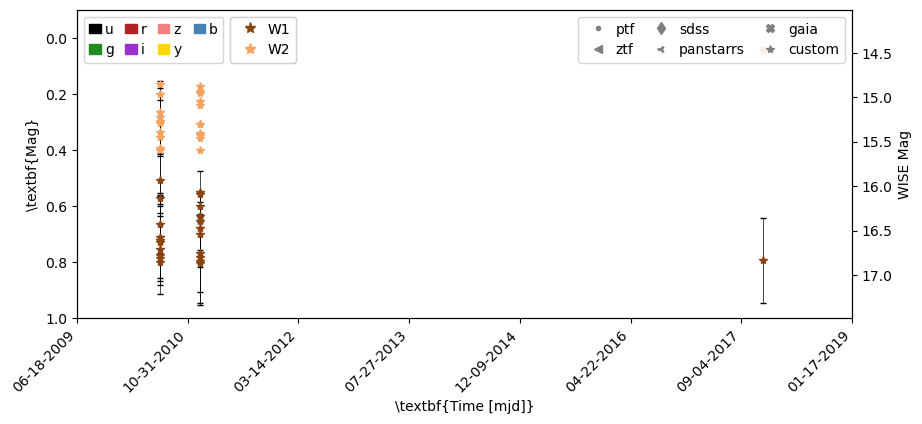

In [8]:
src.plot_lc(include_wise=True)

In [3]:
from Source_Analysis.Light_Curve import Light_Curve

lc = Light_Curve(
    ra=20.10563,
    dec=-17.35930,
)

lc.lc

Querying ztf catalog for light curve...Querying wise catalog for light curve...

Querying neowise catalog for light curve...
Querying ptf catalog for light curve...
Querying sdss catalog for light curve...
Querying panstarrs catalog for light curve...
Pan-STARRS objid not found. Falling back on coordinate query...
Querying gaia catalog for light curve...
Querying custom catalog for light curve...


/Users/adamboesky/Research/long_transients/Source_Analysis/Light_Curve.py:439: RuntimeWarning: Mean of empty slice
  mean_val = np.nanmean(col_data)


KeyError: 'Column objID does not exist'

# NEOWISE Stuff

In [ ]:
# Uncomment the next line to install dependencies if needed.
# !pip install astropy astroquery hpgeom matplotlib pandas pyarrow pyvo
import multiprocessing  # parallelization

import astroquery.vizier  # fetch the sample of CV targets
import hpgeom  # HEALPix math
import numpy as np  # math
import pandas as pd  # manipulate tabular data
import pyarrow.compute  # construct dataset filters
import pyarrow.dataset  # load and query the NEOWISE dataset
import pyarrow.fs  # interact with the S3 bucket storing the NEOWISE catalog
import pyvo  # TAP service for the Vizier query
from astropy import units as u  # manipulate astropy quantities
from astropy.coordinates import SkyCoord  # manipulate sky coordinates
from matplotlib import pyplot as plt  # plot light curves

# copy-on-write will become the default in pandas 3.0 and is generally more performant
pd.options.mode.copy_on_write = True

# all years => about 11 CPU, 65G RAM, and 50 minutes runtime
YEARS = [f"year{yr}" for yr in range(1, 12)] + ["addendum"]

# To try out a smaller version of the notebook,
# uncomment the next line and choose your own subset of years.
# YEARS = [10]  # one year => about 5 CPU, 20G RAM, and 10 minutes runtime
# sets of columns that we'll need
FLUX_COLUMNS = ["w1flux", "w2flux"]
LIGHTCURVE_COLUMNS = ["mjd"] + FLUX_COLUMNS
COLUMN_SUBSET = ["cntr", "ra", "dec"] + LIGHTCURVE_COLUMNS

# cone-search radius defining which NEOWISE sources are associated with each target object
MATCH_RADIUS = 1 * u.arcsec

# This catalog is so big that even the metadata is big.
# Expect this cell to take about 30 seconds per year.

# This information can be found at https://irsa.ipac.caltech.edu/cloud_access/.
bucket = "nasa-irsa-wise"
base_prefix = "wise/neowiser/catalogs/p1bs_psd/healpix_k5"
metadata_path = (
    lambda yr: f"{bucket}/{base_prefix}/{yr}/neowiser-healpix_k5-{yr}.parquet/_metadata"
)
fs = pyarrow.fs.S3FileSystem(region="us-west-2", anonymous=True)

# list of datasets, one per year
year_datasets = [
    pyarrow.dataset.parquet_dataset(metadata_path(yr), filesystem=fs, partitioning="hive")
    for yr in YEARS
]

# unified dataset, all years
neowise_ds = pyarrow.dataset.dataset(year_datasets)

# If you have your own list of target objects, replace this function to load your sample.
def load_targets_Downes2001(radius=1 * u.arcsec):
    """Load a sample of targets and return a pandas DataFrame.

    References:
    - Downes et al., 2001 ([2001PASP..113..764D](https://ui.adsabs.harvard.edu/abs/2001PASP..113..764D/abstract)).
    - https://cdsarc.cds.unistra.fr/ftp/V/123A/ReadMe

    Parameters
    ----------
    radius : astropy.Quantity (optional)
        Radius for the cone search around each target. This is used to determine which partition(s)
        need to be searched for a given target. Use the same radius here as in the rest of the notebook.

    Returns
    -------
    pandas.DataFrame
        The loaded targets with the following columns:
            - uid: Unique identifier of the target.
            - GCVS: Name in the General Catalogue of Variable Stars if it exists, else the constellation name.
            - RAJ2000: Right Ascension of the target in J2000 coordinates.
            - DEJ2000: Declination of the target in J2000 coordinates.
            - healpix_k5: HEALPix pixel index at order k=5.
    """
    astroquery.vizier.Vizier.ROW_LIMIT = -1
    # https://cdsarc.cds.unistra.fr/vizier/notebook.gml?source=V/123A
    # https://cdsarc.cds.unistra.fr/ftp/V/123A/ReadMe
    CATALOGUE = "V/123A"
    voresource = pyvo.registry.search(ivoid=f"ivo://CDS.VizieR/{CATALOGUE}")[0]
    tap_service = voresource.get_service("tap")

    # Query Vizier and load targets to a dataframe.
    cv_columns = ["uid", "GCVS", "RAJ2000", "DEJ2000"]
    cvs_records = tap_service.run_sync(
        f'SELECT {",".join(cv_columns)} from "{CATALOGUE}/cv"'
    )
    cvs_df = cvs_records.to_table().to_pandas()

    # Add a new column containing a list of all order k HEALPix pixels that overlap with
    # the CV's position plus search radius.
    cvs_df["healpix_k5"] = [
        hpgeom.query_circle(
            a=cv.RAJ2000,
            b=cv.DEJ2000,
            radius=radius.to_value("deg"),
            nside=hpgeom.order_to_nside(order=5),
            nest=True,
            inclusive=True,
        )
        for cv in cvs_df.itertuples()
    ]
    # Explode the lists of pixels so the dataframe has one row per target per pixel.
    # Targets near a pixel boundary will now have more than one row.
    # Later, we'll search each pixel separately for NEOWISE detections and then
    # concatenate the matches for each target to produce complete light curves.
    cvs_df = cvs_df.explode("healpix_k5", ignore_index=True)

    return cvs_df
# This is the main function.
def load_lightcurves_one_partition(targets_group):
    """Load lightcurves from a single partition.

    Parameters
    ----------
    targets_group : tuple
        Tuple of pixel index and sub-DataFrame (result of DataFrame groupby operation).

    Returns
    -------
    pd.DataFrame
        The lightcurves for targets found in this partition.
    """
    # These global variables will be set when the worker is initialized.
    global _neowise_ds
    global _columns
    global _radius

    # Get row filters that will limit the amount of data loaded from this partition.
    # It is important for these filters to be efficient for the specific use case.
    filters = _construct_dataset_filters(targets_group=targets_group, radius=_radius)

    # Load this slice of the dataset to a pyarrow Table.
    pixel_tbl = _neowise_ds.to_table(columns=_columns, filter=filters)

    # Associate NEOWISE detections with targets to get the light curves.
    lightcurves_df = _cone_search(
        targets_group=targets_group, pixel_tbl=pixel_tbl, radius=_radius
    )

    return lightcurves_df
# The filters returned by this function need to be efficient for the specific use case.
def _construct_dataset_filters(*, targets_group, radius, scale_factor=100):
    """Construct dataset filters for a box search around all targets in the partition.

    Parameters
    ----------
    targets_group : tuple
        Tuple of pixel index and sub-DataFrame (result of DataFrame groupby operation).
    radius : astropy.Quantity
        The radius used for constructing the RA and Dec filters.
    scale_factor : int (optional)
        Factor by which the radius will be multiplied to ensure that the box encloses
        all relevant detections.

    Returns
    -------
    filters : pyarrow.compute.Expression
        The constructed filters based on the given inputs.
    """
    pixel, locations_df = targets_group

    # Start with a filter for the partition. This is the most important one because
    # it tells the Parquet reader to just skip all the other partitions.
    filters = pyarrow.compute.field("healpix_k5") == pixel

    # Add box search filters. For our CV sample, one box encompassing all targets in
    # the partition should be sufficient. Make a different choice if you use a different
    # sample and find that this loads more data than you want to handle at once.
    buffer_dist = scale_factor * radius.to_value("deg")
    for coord, target_coord in zip(["ra", "dec"], ["RAJ2000", "DEJ2000"]):
        coord_fld = pyarrow.compute.field(coord)

        # Add a filter for coordinate lower limit.
        coord_min = locations_df[target_coord].min()
        filters = filters & (coord_fld > coord_min - buffer_dist)

        # Add a filter for coordinate upper limit.
        coord_max = locations_df[target_coord].max()
        filters = filters & (coord_fld < coord_max + buffer_dist)

    # Add your own additional requirements here, like magnitude limits or quality cuts.
    # See the AllWISE notebook for more filter examples and links to pyarrow documentation.
    # We'll add a filter for sources not affected by contamination or confusion.
    filters = filters & pyarrow.compute.equal(pyarrow.compute.field("cc_flags"), "0000")

    return filters
def _cone_search(*, targets_group, pixel_tbl, radius):
    """Perform a cone search to select NEOWISE detections belonging to each target object.

    Parameters
    ----------
    targets_group : tuple
        Tuple of pixel index and sub-DataFrame (result of DataFrame groupby operation).
    pixel_tbl : pyarrow.Table
        Table of NEOWISE data for a single pixel
    radius : astropy.Quantity
        Cone search radius.

    Returns
    -------
    match_df : pd.DataFrame
        A dataframe with all matched sources.
    """
    _, targets_df = targets_group

    # Cone search using astropy to select NEOWISE detections belonging to each object.
    pixel_skycoords = SkyCoord(ra=pixel_tbl["ra"] * u.deg, dec=pixel_tbl["dec"] * u.deg)
    targets_skycoords = SkyCoord(targets_df["RAJ2000"], targets_df["DEJ2000"], unit=u.deg)
    targets_ilocs, pixel_ilocs, _, _ = pixel_skycoords.search_around_sky(
        targets_skycoords, radius
    )

    # Create a dataframe with all matched source detections.
    match_df = pixel_tbl.take(pixel_ilocs).to_pandas()

    # Add the target IDs by joining with targets_df.
    match_df["targets_ilocs"] = targets_ilocs
    match_df = match_df.set_index("targets_ilocs").join(targets_df.reset_index().uid)

    return match_df
# This function will be called once for each worker in the pool.
def init_worker(neowise_ds, columns, radius):
    """Set global variables '_neowise_ds', '_columns', and '_radius'.

    These variables will be the same for every call to 'load_lightcurves_one_partition'
    and will be set once for each worker. It is important to pass 'neowise_ds' this
    way because of its size and the way it will be used. (For the other two, it makes
    little difference whether we use this method or pass them directly as function
    arguments to 'load_lightcurves_one_partition'.)

    Parameters
    ----------
    neowise_ds : pyarrow.dataset.Dataset
        NEOWISE metadata loaded as a PyArrow dataset.
    columns : list
        Columns to include in the output DataFrame of light curves.
    radius : astropy.Quantity
        Cone search radius.
    """
    global _neowise_ds
    _neowise_ds = neowise_ds
    global _columns
    _columns = columns
    global _radius
    _radius = radius

targets_df = load_targets_Downes2001(radius=MATCH_RADIUS)
targets_df.head()

# Group targets by partition. 'load_lightcurves_one_partition' will be called once per group.
targets_groups = targets_df.groupby("healpix_k5")
# Arguments for 'init_worker'.
init_args = (neowise_ds, COLUMN_SUBSET, MATCH_RADIUS)

# Start a multiprocessing pool and load the target light curves in parallel.
# About 1900 unique pixels in targets_df, 8 workers, 48 chunksize => ~5 chunks per worker.
nworkers = 8
chunksize = 48
with multiprocessing.Pool(nworkers, initializer=init_worker, initargs=init_args) as pool:
    lightcurves = []
    for lightcurves_df in pool.imap_unordered(
        load_lightcurves_one_partition, targets_groups, chunksize=chunksize
    ):
        lightcurves.append(lightcurves_df)
neowise_lightcurves_df = pd.concat(lightcurves).sort_values("mjd").reset_index(drop=True)
neowise_lightcurves_df.head()

# get the light curves of the target with the most data
target_uid = neowise_lightcurves_df.groupby("uid").mjd.count().sort_values().index[-1]
target_df = neowise_lightcurves_df.loc[neowise_lightcurves_df.uid == target_uid]

# list of indexes that separate epochs (arbitrarily at delta mjd > 30)
epoch_idxs = target_df.loc[target_df.mjd.diff() > 30].index.to_list()
epoch_idxs = epoch_idxs + [target_df.index[-1]]  # add the final index

# make the figure
ncols = 4
nrows = int(np.ceil(len(epoch_idxs) / ncols))
fig, axs = plt.subplots(nrows, ncols, sharey=True, figsize=(3 * ncols, 2.5 * nrows))
axs = axs.flatten()
idx0 = target_df.index[0]
for i, (idx1, ax) in enumerate(zip(epoch_idxs, axs)):
    epoch_df = target_df.loc[idx0 : idx1 - 1, LIGHTCURVE_COLUMNS].set_index("mjd")
    for col in FLUX_COLUMNS:
        ax.plot(epoch_df[col], ".", markersize=3, label=col)
    ax.set_title(f"epoch {i}")
    ax.xaxis.set_ticks(  # space by 10
        range(int((ax.get_xlim()[0] + 10) / 10) * 10, int(ax.get_xlim()[1]), 10)
    )
    idx0 = idx1

axs[0].legend()
fig.supxlabel("MJD")
fig.supylabel("RAW FLUX")
fig.suptitle(f"NEOWISE light curves for target CV {target_uid}")
fig.tight_layout()
plt.show(block=False)

# Finding filtered out sources

In [1]:
import os
import sys

from astropy.table import Table, vstack, join

sys.path.append('/Users/adamboesky/Research/long_transients')

from typing import Literal, List
from Extracting.utils import load_ecsv

CasJobs will use the credentials from mast_login.txt


In [2]:
def get_sources_filtered_by(
    filter_name: str,
    catalogs: List[Literal['in_both', 'in_ztf', 'in_pstarr']],
    in_bands: List[Literal['g', 'r', 'i']],
    filter_dirpath: str = '/Users/adamboesky/Research/long_transients/Data/filter_results',
):

    # Get the fields in the filtered directory
    fields = os.listdir(filter_dirpath)
    fields.remove('combined')
    fields.remove('.DS_Store')

    # Set up sources with empty tables to fill in
    empty_coord_table = Table(data={'ra':[], 'dec':[], 'filter':[]}, dtype=['float64', 'float64', 'str'])
    srcs = {catalog: empty_coord_table.copy() for catalog in catalogs}
    catalog_map = {'in_both': 0, 'in_ztf': 1, 'in_pstarr': 2}

    # Loop through fields, catalogs, and bands to fill in the sources
    for field in fields:
        print(f'Checking field: {field}')
        for catalog in catalogs:

            # Get sources that are in the filtered out table for all required bands
            filtered_out_tab = load_ecsv(
                    f'{filter_dirpath}/{field}/{catalog_map[catalog]}_{in_bands[0]}_filtered_out.ecsv'
                )
            for band in in_bands[1:]:
                filtered_out_tab_band = load_ecsv(
                    f'{filter_dirpath}/{field}/{catalog_map[catalog]}_{band}_filtered_out.ecsv'
                )
                if len(filtered_out_tab) == 0 or len(filtered_out_tab_band) == 0:
                    filtered_out_tab = empty_coord_table.copy()
                else:
                    filtered_out_tab = join(filtered_out_tab, filtered_out_tab_band, join_type='inner', keys=['ra', 'dec', 'filter'])

            # Get the sources with the desired filter
            filter_mask = filtered_out_tab['filter'] == filter_name
            srcs[catalog] = vstack([srcs[catalog], filtered_out_tab[filter_mask]])

    if len(catalogs) == 1:
        return srcs[catalogs[0]]
    return srcs

In [3]:
pm_srcs = get_sources_filtered_by('proper_motion_filter', catalogs=['in_ztf'], in_bands=['g', 'r', 'i'])

Checking field: 000297
Checking field: 000298
Checking field: 000296
Checking field: 000276
Checking field: 000445
Checking field: 000444
Checking field: 000294
Checking field: 000293
Checking field: 000292
Checking field: 000295
Checking field: 000448
Checking field: 000446
Checking field: 000447
Checking field: 000449


In [4]:
from Source_Analysis.Sources import Sources

/Users/adamboesky/opt/anaconda3/envs/long_transients/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
srcs = Sources(pm_srcs['ra'], pm_srcs['dec'])

In [ ]:
import matplotlib.pyplot as plt

Falling back on ZTF image metadata with coordinate query...
Querying metadata from https://irsa.ipac.caltech.edu/ibe/search/ztf/products/deep?WHERE=ra>12.354294609011442+AND+ra<13.243183509011443+AND+dec>-20.91255007537693+AND+dec<-20.023661175376933
'fieldid'
Traceback:
Traceback (most recent call last):
  File "/Users/adamboesky/opt/anaconda3/envs/long_transients/lib/python3.12/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'fieldid'

The above exception was the direct cause of the following exception:



KeyError: 'r'

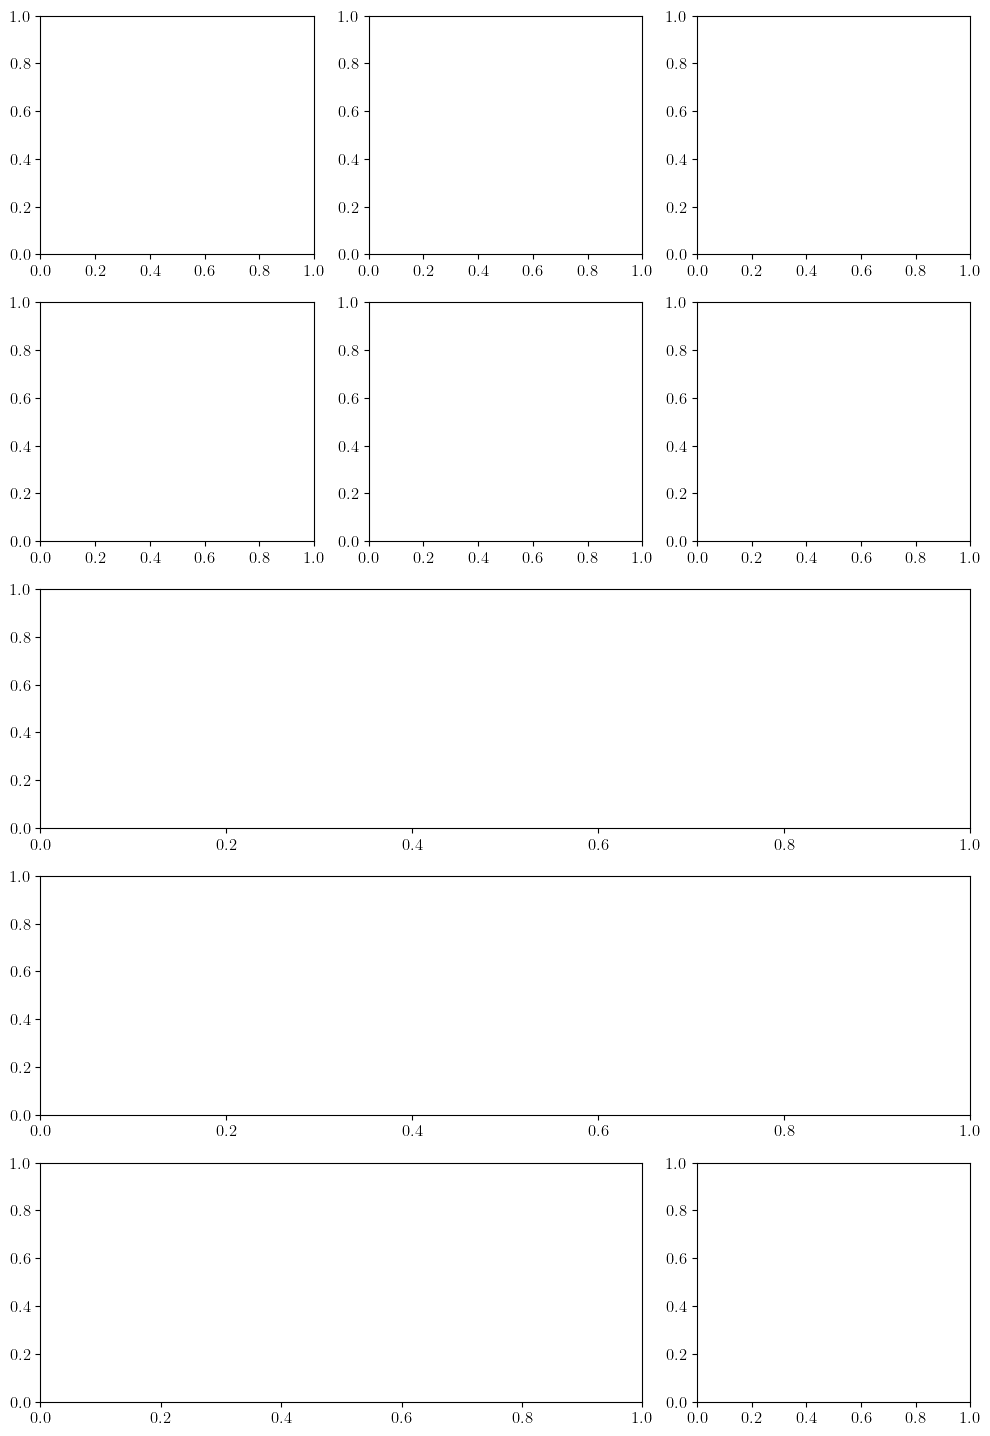

In [51]:
for src in srcs:
    src.plot_everything()
    plt.savefig(f'/Users/adamboesky/Desktop/pm_srcs/{str(round(src.ra, 4)).replace('.', 'p').replace('-', 'n')}_{str(round(src.dec, 4)).replace('.', 'p').replace('-', 'n')}')